In [211]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2021-04-21T20:33:07.832249+02:00

Python implementation: CPython
Python version       : 3.9.2
IPython version      : 7.21.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.29)
OS          : Darwin
Release     : 20.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit



In [212]:
import pandas as pd
import numpy as np

In [213]:
import sys
!{system.executable}

zsh:1: command not found: system.executable


In [214]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,12) #10 pulgadas de ancho y 10 de alto para todos los plots

### Data Reading

In [215]:
vehicles = pd.read_csv("../data/vehicles.2.clean_analysis.csv")

In [216]:
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive_wheels,Class,fuelType,consumption,CO2_emissions
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500


In this case, we are going to group those variables which can be gathered into more generic groups. This will help us to analyze the dataset by clusters instead individual elements. 

To perform this step, we can see the number of different values each categorial variable may have. 

In [217]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))
unique_col_values(vehicles)

manufacturer | 133 | object
model | 3791 | object
year | 35 | int64
displ | 67 | float64
cylinders | 10 | float64
transmission | 38 | object
drive_wheels | 8 | object
Class | 34 | object
fuelType | 14 | object
consumption | 84 | int64
CO2_emissions | 597 | float64


### Categorical variables clustering

#### Model car

In [218]:
vehicles.Class.unique()

array(['Special Purpose Vehicle 2WD', 'Midsize Cars', 'Subcompact Cars',
       'Compact Cars', 'Sport Utility Vehicle - 4WD',
       'Small Sport Utility Vehicle 2WD',
       'Small Sport Utility Vehicle 4WD', 'Two Seaters',
       'Sport Utility Vehicle - 2WD', 'Special Purpose Vehicles',
       'Special Purpose Vehicle 4WD', 'Small Station Wagons',
       'Minicompact Cars', 'Midsize-Large Station Wagons',
       'Midsize Station Wagons', 'Large Cars',
       'Standard Sport Utility Vehicle 4WD',
       'Standard Sport Utility Vehicle 2WD', 'Minivan - 4WD',
       'Minivan - 2WD', 'Vans', 'Vans, Cargo Type',
       'Vans, Passenger Type', 'Standard Pickup Trucks 2WD',
       'Standard Pickup Trucks', 'Standard Pickup Trucks/2wd',
       'Small Pickup Trucks 2WD', 'Standard Pickup Trucks 4WD',
       'Small Pickup Trucks 4WD', 'Small Pickup Trucks', 'Vans Passenger',
       'Special Purpose Vehicle', 'Special Purpose Vehicles/2wd',
       'Special Purpose Vehicles/4wd'], dtype=object

In [219]:
small = ['Compact Cars', 'Subcompact Cars', 'Two Seaters', 'Minicompact Cars']
medium = ['Midsize Cars']
large = ['Large Cars']

vehicles.loc[vehicles['Class'].isin(small),
            'Class'] = 'Small Cars'

vehicles.loc[vehicles['Class'].isin(medium),
            'Class'] = 'Medium Cars'

vehicles.loc[vehicles['Class'].isin(large),
            'Class'] = 'Large Cars'

vehicles.loc[vehicles['Class'].str.contains('Truck'),
            'Class'] = 'Trucks'

vehicles.loc[vehicles['Class'].str.contains('Special Purpose'),
            'Class'] = 'Special Vehicles'

vehicles.loc[vehicles['Class'].str.contains('Sport'),
            'Class'] = 'Sport Car'

vehicles.loc[vehicles['Class'].str.contains('Station'), 
            'Class'] = 'Station'

vehicles.loc[(vehicles['Class'].str.lower().str.contains('van')),
            'Class'] = 'Van'

In [220]:
vehicles.Class = vehicles.Class.astype("category")

In [221]:
vehicles.Class.value_counts()

Small Cars          13055
Trucks               5446
Sport Car            5313
Medium Cars          4274
Station              2540
Special Vehicles     2216
Van                  2213
Large Cars           1873
Name: Class, dtype: int64

### Drive wheels type

In [222]:
vehicles['drive_wheels'].unique()

array(['2-Wheel Drive', 'Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', 'All-Wheel Drive', nan,
       '4-Wheel Drive', 'Part-time 4-Wheel Drive'], dtype=object)

In [223]:
vehicles["drive"] = "two"
vehicles["drive"][vehicles['drive_wheels'].isin([
    "4-Wheel or All-Wheel Drive", "All-Wheel Drive",
       "4-Wheel Drive", "Part-time 4-Wheel Drive"
])] = "four"

In [224]:
vehicles['drive'].value_counts()

two     26977
four     9953
Name: drive, dtype: int64

This warning is communicating to us we are alterating a copy of vehicles (vehicles_year), not vehicles.
To undo it:

In [225]:
pd.set_option('chained_assignment', None)

Or simply use loc to asign values on pandas

In [226]:
vehicles["drive_wheels"] = "two"
vehicles.loc[vehicles["drive_wheels"].isin([
    "4-Wheel or All-Wheel Drive", "All-Wheel Drive",
       "4-Wheel Drive", "Part-time 4-Wheel Drive"
]), "drive_wheels"] = "four"

In [227]:
vehicles.drive = vehicles.drive.astype("category")

In [228]:
vehicles['drive'].value_counts()

two     26977
four     9953
Name: drive, dtype: int64

### Transmission

In [229]:
vehicles.transmission.unique()

array(['Automatic 3-spd', 'Automatic 4-spd', 'Manual 5-spd',
       'Automatic (S5)', 'Manual 6-spd', 'Automatic 5-spd',
       'Automatic (AM8)', 'Automatic (AM-S8)', 'Automatic (AV-S7)',
       'Automatic (S6)', 'Automatic (S9)', 'Automatic (AM-S7)',
       'Automatic (S4)', 'Automatic (AM-S9)', 'Automatic (S7)',
       'Automatic (AM7)', 'Automatic (AM6)', 'Automatic 6-spd',
       'Automatic 8-spd', 'Manual 4-spd', 'Automatic (S8)',
       'Manual 7-spd', 'Automatic (AM-S6)', 'Auto(AM-S6)',
       'Automatic (variable gear ratios)', 'Automatic (AV-S8)',
       'Automatic (A1)', 'Automatic (AV-S6)', 'Manual 3-spd',
       'Automatic (S10)', 'Automatic 9-spd', 'Manual 4-spd Doubled', nan,
       'Automatic (L4)', 'Automatic (L3)', 'Automatic (AV-S10)',
       'Automatic 7-spd', 'Automatic (AM5)'], dtype=object)

We see that transmissions can be categorized by manual or automatic

In [230]:
vehicles.loc[vehicles['transmission'].str.contains("Automatic"),
             'transmission']= "Automatic"

vehicles.loc[vehicles['transmission'].str.startswith('M'), 
             'transmission'] = "Manual"

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In case of an error, we shall check whether exist null values on the category

In [247]:
vehicles['transmission'].dropna()

0        Automatic 3-spd
1        Automatic 3-spd
2        Automatic 3-spd
3        Automatic 3-spd
4        Automatic 4-spd
              ...       
36915    Automatic (AM5)
36916    Automatic (AM6)
36917       Manual 5-spd
36918    Automatic (AM6)
36919       Manual 5-spd
Name: transmission, Length: 36786, dtype: object

In [248]:
vehicles['transmission'].unique()

array(['Automatic 3-spd', 'Automatic 4-spd', 'Manual 5-spd',
       'Automatic (S5)', 'Manual 6-spd', 'Automatic 5-spd',
       'Automatic (AM8)', 'Automatic (AM-S8)', 'Automatic (AV-S7)',
       'Automatic (S6)', 'Automatic (S9)', 'Automatic (AM-S7)',
       'Automatic (S4)', 'Automatic (AM-S9)', 'Automatic (S7)',
       'Automatic (AM7)', 'Automatic (AM6)', 'Automatic 6-spd',
       'Automatic 8-spd', 'Manual 4-spd', 'Automatic (S8)',
       'Manual 7-spd', 'Automatic (AM-S6)', 'Auto(AM-S6)',
       'Automatic (variable gear ratios)', 'Automatic (AV-S8)',
       'Automatic (A1)', 'Automatic (AV-S6)', 'Manual 3-spd',
       'Automatic (S10)', 'Automatic 9-spd', 'Manual 4-spd Doubled',
       'Automatic (L4)', 'Automatic (L3)', 'Automatic (AV-S10)',
       'Automatic 7-spd', 'Automatic (AM5)'], dtype=object)

In [249]:
vehicles.loc[vehicles['transmission'].str.contains("Automatic"),
             'transmission']= "Automatic"

vehicles.loc[vehicles['transmission'].str.startswith('M'), 
             'transmission'] = "Manual"

In [250]:
vehicles['transmission'].unique()

array(['Automatic', 'Manual', 'Auto(AM-S6)'], dtype=object)

### Fuel Type

In [251]:
vehicles.fuelType.value_counts()

Normal             24095
Premium            10378
Gasoline or E85     1215
Others              1098
Name: fuelType, dtype: int64

As we see the distribution of cars by fuelType are concentrated. Thus, we will gather these categories and join them among those which are valid for our study: "Polution" 

In [252]:
vehicles.loc[vehicles['fuelType'].str.contains('Regular'),
            'fuelType'] = 'Normal'

vehicles.loc[vehicles['fuelType'].str.contains('Premium'),
            'fuelType'] = 'Premium'

vehicles.loc[vehicles['fuelType'].str.contains('Electricity'),
            'fuelType'] = 'Hybrid'

In [253]:
vehicles.fuelType.value_counts()

Normal             24095
Premium            10378
Gasoline or E85     1215
Others              1098
Name: fuelType, dtype: int64

In [254]:
vehicles.loc[vehicles['fuelType'].str.contains('Regular'),
            'fuelType'] = 'Normal'

vehicles.loc[vehicles['fuelType'].str.contains('Premium'),
            'fuelType'] = 'Premium'

vehicles.loc[vehicles['fuelType'].str.contains('Electricity'),
            'fuelType'] = 'Hybrid'

vehicles.loc[vehicles.fuelType.isin([
    "Diesel", "Midgrade",
    "CNG", "Gasoline or natural gas",
    "Gasoline or propane"
]),"fuelType" ] = "Others"

In [255]:
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive_wheels,Class,fuelType,consumption,CO2_emissions,drive,types_motor_size,types_consumption,co2_type
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic,two,Special Vehicles,Normal,17,522.764706,two,small,small,large
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic,two,Special Vehicles,Normal,13,683.615385,two,large,very small,very large
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic,two,Special Vehicles,Normal,16,555.437500,two,small,very small,large
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic,two,Special Vehicles,Normal,13,683.615385,two,large,very small,very large
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic,two,Medium Cars,Premium,16,555.437500,two,large,very small,large


In [256]:
vehicles.fuelType.value_counts()

Normal             24095
Premium            10378
Gasoline or E85     1215
Others              1098
Name: fuelType, dtype: int64

In [257]:
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive_wheels,Class,fuelType,consumption,CO2_emissions,drive,types_motor_size,types_consumption,co2_type
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic,two,Special Vehicles,Normal,17,522.764706,two,small,small,large
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic,two,Special Vehicles,Normal,13,683.615385,two,large,very small,very large
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic,two,Special Vehicles,Normal,16,555.437500,two,small,very small,large
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic,two,Special Vehicles,Normal,13,683.615385,two,large,very small,very large
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic,two,Medium Cars,Premium,16,555.437500,two,large,very small,large


### Continuous variables clustering

A simple way to convert continuous variables is by using quintiles

In [258]:
types_motor_size = ['very small', 'small', 'medium', 'large', 'very large']

vehicles['types_motor_size'] = pd.qcut(vehicles['displ'],
                                     5, types_motor_size)

In [259]:
types_consumption = ['very small', 'small', 'medium' , 'large', 'very large']

vehicles['types_consumption'] = pd.qcut(vehicles['consumption'], 
                                       5, types_consumption)

In [260]:
types_co2 = ['very small', 'small', 'medium' , 'large', 'very large']

vehicles['co2_type'] = pd.qcut(vehicles['CO2_emissions'],
                              5, types_co2)

In [261]:
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive_wheels,Class,fuelType,consumption,CO2_emissions,drive,types_motor_size,types_consumption,co2_type
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic,two,Special Vehicles,Normal,17,522.764706,two,small,small,large
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic,two,Special Vehicles,Normal,13,683.615385,two,large,very small,very large
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic,two,Special Vehicles,Normal,16,555.437500,two,small,very small,large
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic,two,Special Vehicles,Normal,13,683.615385,two,large,very small,very large
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic,two,Medium Cars,Premium,16,555.437500,two,large,very small,large


When checking the dataset, we noticed there is an error between the comb08 which stands for combined Miles per Galon (fuel consumption)and CO2.
Those cars which consume more fuel are, indeed, those that are going to emit more polution.
So, we see how the variables relates with each other

<AxesSubplot:xlabel='consumption', ylabel='CO2_emissions'>

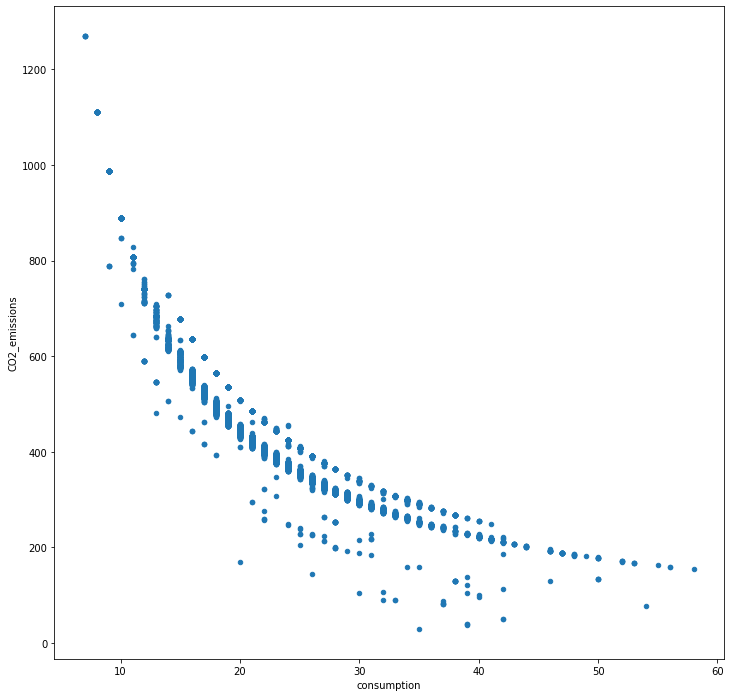

In [262]:
vehicles.plot.scatter(x="consumption", y="CO2_emissions")

This inverse relation are explained on the documentation of the dataset. CO2 consumption is measured by grams per mile, while the consumption is measured by miles per galon.
We need to invert the consumption to galons per mile.

Besides, we are going to measure litres per galon.


In [263]:
litres_per_galon = 3.78541
vehicles['consumption_litres_mile'] = litres_per_galon / vehicles.consumption

In [264]:
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive_wheels,Class,fuelType,consumption,CO2_emissions,drive,types_motor_size,types_consumption,co2_type,consumption_litres_mile
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic,two,Special Vehicles,Normal,17,522.764706,two,small,small,large,0.222671
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic,two,Special Vehicles,Normal,13,683.615385,two,large,very small,very large,0.291185
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic,two,Special Vehicles,Normal,16,555.437500,two,small,very small,large,0.236588
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic,two,Special Vehicles,Normal,13,683.615385,two,large,very small,very large,0.291185
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic,two,Medium Cars,Premium,16,555.437500,two,large,very small,large,0.236588


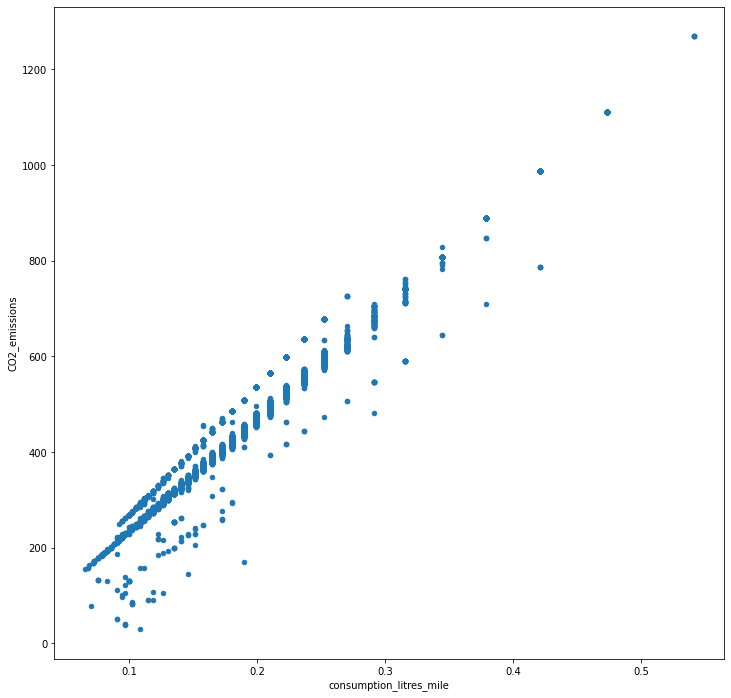

In [265]:
vehicles.plot.scatter(x='consumption_litres_mile', y='CO2_emissions');

In [268]:
types_consumption = ['very small', 'small', 'medium' , 'large', 'very large']
vehicles['types_consumption'] = pd.qcut(vehicles['consumption_litres_mile'],
                                      5, types_consumption)
vehicles.types_consumption.head()

0         large
1    very large
2         large
3    very large
4         large
Name: types_consumption, dtype: category
Categories (5, object): ['very small' < 'small' < 'medium' < 'large' < 'very large']

In [269]:
vehicles.dtypes

manufacturer                 object
model                        object
year                          int64
displ                       float64
cylinders                   float64
transmission                 object
drive_wheels                 object
Class                      category
fuelType                     object
consumption                   int64
CO2_emissions               float64
drive                      category
types_motor_size           category
types_consumption          category
co2_type                   category
consumption_litres_mile     float64
dtype: object

### Conclussion
Consumption variable is defined by miles per galon and the CO2 is defined by grames per mile.
Since the CO2 is the main variable of the dataset, we have created another variable called consumption_litres_mile in order to compare it with CO2

### Exporting
It is very common to save the datafile as CSV. The main problem arises using CSV is all data calculated or obtained over the dataframe will be lost.

We shall instead, save the file on a Python native format to save dataframes in between steps, for the later saving of the final dataset as CSV file.

The standard serialization of Python is Pyckle. From an user point of view, it will found the dataset the same way we found when closing Jupyter notebook and reopen it again. 

In [270]:
vehicles.to_pickle("../data/vehicles.3.clustered_variables.pkl")